In [221]:
#import the requried libraries

import pandas as pd #for dataframe 
import nltk #for text processing
import numpy as np 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cf
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [222]:
#packages insallations

# !pip install textblob
# !pip install wordcloud
# !pip install seaborn
# !pip install cufflinks
# !pip install scipy
# !pip install transformers

In [223]:
#connect to the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Reduction** 

In [224]:
# #read(as pandas dataframe) and display the head values of the dataset 
# df = pd.read_json('Industrial_and_Scientific.json' ,lines=True)
# df.head()

In [225]:
# #data types of the dataframe
# df.dtypes

In [226]:
# #dataframe shape
# df.shape

In [227]:
# #convert the reviewTime to datetime format
# df['reviewTime'] =  pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

In [228]:
# #datatype check after convering reviwTime column
# df.dtypes

In [229]:
# #filter based on year(only get the data from 2015-2018)-Data reduction in data preprocessing-to reduce the costs associated with data mining or data analysis and get the latest data for the project from the selected dataset
# import datetime as dt
# df = df[df['reviewTime'].dt.year == 2018]

In [230]:
# #dataframe shape after filtering
# df.shape

In [231]:
# #new dataframe save as csv
# df.to_csv('Industrial_and_Scientific.csv')

# **Data Preprocessing**

In [232]:
#read the dataset
df=pd.read_csv('/content/drive/MyDrive/Data Management Project/Dataset/Industrial_and_Scientific.csv')

In [233]:
#head values
df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,303,5,True,2018-01-21,A314RSJF963JYD,B0000223SK,EJ in Seattle,Love this stuff! Works on several tools and i...,Excellent!,1516492800,NaN,{'Size:': ' 1-Pack'},NaN
1,304,4,True,2018-01-13,AUL5LCV4TT73P,B0000223SK,TnT,As advertised,As advertised,1515801600,NaN,{'Size:': ' 1-Pack'},NaN
2,305,5,True,2018-01-07,A2IRX14SLTFW6L,B0000223SK,pattyk,"Great product. Works well. Thank you, Mike",Five Stars,1515283200,NaN,{'Size:': ' 1-Pack'},NaN
3,552,5,True,2018-04-11,A2HOVQIM12DEZM,B0000223UV,VFW 887,"Great Price, fast service",Five Stars,1523404800,NaN,{'Size:': ' 1 - Pack'},NaN
4,553,3,True,2018-04-05,A38U47FUMS5319,B0000223UV,Kenny Davis,Not As Strong As I Thought Would Be,Not As Strong As I Thought Would,1522886400,NaN,{'Size:': ' 1 - Pack'},NaN


In [234]:
# reset the index and rename the resulting column
df = df.reset_index().rename(columns={'index': 'id'})

In [235]:
#shape of the dataframe
df.shape

(203801, 14)

In [236]:
#data types of the dataframe
df.dtypes

id                  int64
Unnamed: 0          int64
overall             int64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote              float64
style              object
image              object
dtype: object

In [237]:
#only filter the verified reviews
df = df[df.verified == True]
df.shape #shape of the dataframe after filtering

(197340, 14)

In [238]:
#null rows
df= df[['id','reviewText','overall','summary']]
null_rows=df.isnull().sum() #null rows count
null_rows

id              0
reviewText    184
overall         0
summary       104
dtype: int64

In [239]:
#remove the null rows(due to very less null values)
df=df.dropna() 
df.shape #shape of the dataframe after dropping the null values

(197073, 4)

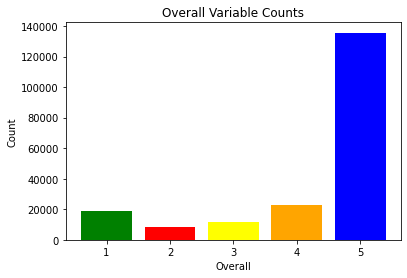

In [240]:
# Count the occurrences of each overall score
counts = df['overall'].value_counts()

# Define colors for each category
colors = ['blue', 'orange', 'green','yellow','red']

# Create a bar chart
plt.bar(counts.index, counts.values, color=colors)

# Set the title and axis labels
plt.title('Overall Variable Counts')
plt.xlabel('Overall')
plt.ylabel('Count')

# Display the plot
plt.show()

In [241]:
#head values of products reviews
df.reviewText.head()

0    Love this stuff!  Works on several tools and i...
1                                        As advertised
2        Great product.  Works well.  Thank you,  Mike
3                            Great Price, fast service
4                  Not As Strong As I Thought Would Be
Name: reviewText, dtype: object

In [242]:
#sample review preview
review_example=df.reviewText[0]
review_example

'Love this stuff!  Works on several tools and is quality product!'

In [243]:
#remove all the punctuations and numbers from the text
review_example1=re.sub("[^a-zA-Z]",' ',review_example)
review_example1

'Love this stuff   Works on several tools and is quality product '

In [244]:
#convert all the letters to lowercase letters
review_example1=review_example1.lower().split()
review_example1

['love',
 'this',
 'stuff',
 'works',
 'on',
 'several',
 'tools',
 'and',
 'is',
 'quality',
 'product']

In [245]:
#remove all the punctuations and numbers from the reviewText and convert to lower cases(considering all the rows in reviwText)
rt=lambda x: re.sub("[^a-zA-Z]",' ',str(x))
df["reviewText"]=df["reviewText"].map(rt)
df["reviewText"]=df["reviewText"].str.lower()
df.head()

,id,reviewText,overall,summary
0,0,love this stuff works on several tools and i...,5,Excellent!
1,1,as advertised,4,As advertised
2,2,great product works well thank you mike,5,Five Stars
3,3,great price fast service,5,Five Stars
4,4,not as strong as i thought would be,3,Not As Strong As I Thought Would


In [246]:
#just take 100 reviews to checking the sentiment
df=df.head(100)

# **Apply suitable classifiers**

## **Sentiment Analyze(NLTK)**



This method takes each word and score individually

---



In [247]:
#loop through the entire dataset & set the sentiment for the review...
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))
for index,row in df["reviewText"].iteritems():
    score=SentimentIntensityAnalyzer().polarity_scores(row)
    neg=score["neg"]
    neu=score["neu"]
    pos=score["pos"]
    if neg>pos:
        df.loc[index,'sentiment']='Negative'
    elif pos>neg:
        df.loc[index,'sentiment']='Positive'
    else:
        df.loc[index,'sentiment']="Neutral"

In [248]:
# df[df['sentiment']=='Positive'].sort_values()

In [249]:
#head values of the dataframe with new column 'sentiment' which contains the sentiment of the review
df.head()

,id,reviewText,overall,summary,polarity,subjectivity,sentiment
0,0,love this stuff works on several tools and i...,5,Excellent!,0.250000,0.300000,Positive
1,1,as advertised,4,As advertised,0.000000,0.000000,Neutral
2,2,great product works well thank you mike,5,Five Stars,0.800000,0.750000,Positive
3,3,great price fast service,5,Five Stars,0.500000,0.675000,Positive
4,4,not as strong as i thought would be,3,Not As Strong As I Thought Would,0.433333,0.733333,Negative


In [250]:
#select only required columns..
df_new= df[['reviewText', 'sentiment']]
df_new.head() #print the head values

,reviewText,sentiment
0,love this stuff works on several tools and i...,Positive
1,as advertised,Neutral
2,great product works well thank you mike,Positive
3,great price fast service,Positive
4,not as strong as i thought would be,Negative


### **Visualizing Results**

Text(0.5, 1.0, 'Sentiment count within 3 categories')

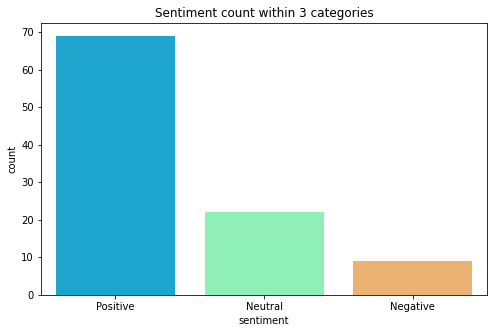

In [251]:
#plot the sentiment type count using bar chart
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment',data=df, palette='rainbow')
plt.title("Sentiment count within 3 categories")

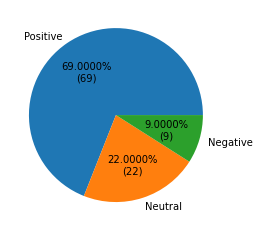

In [252]:
#plot the results using pie chart
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)
v_counts = df['sentiment'].value_counts()
total = df['sentiment'].shape[0]
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt);

## **Sentiment Analyze(Roberta pre-trained model)**




This method accounts for the words but also the context related to other words

In [253]:
#access the pretrained model(from hugging face)|model trained on twitter comments
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [254]:
review_example

'Love this stuff!  Works on several tools and is quality product!'

In [255]:
#tokenize the review text
encoded_text=tokenizer(review_example,return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0, 16587,    42,  2682,   328,  1437,  9478,    15,   484,  3270,
             8,    16,  1318,  1152,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [256]:
#run on Roberta Model(the example product review)
output=model(**encoded_text)
sentiment_scores=output[0][0].detach().numpy()
sentiment_scores=softmax(sentiment_scores)
sentiment_scores_dict={
    'neg':sentiment_scores[0],
    'neu':sentiment_scores[1],
    'pos':sentiment_scores[2]

}
print(sentiment_scores_dict)

{'neg': 0.0023522973, 'neu': 0.012491355, 'pos': 0.9851563}


In [257]:
#same comment run on the VADER model
SIA = SentimentIntensityAnalyzer()
SIA.polarity_scores(review_example)

{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.6988}

In [258]:
#sample review
review_example

'Love this stuff!  Works on several tools and is quality product!'

It can be seen that,this review seems positive, by reading it.So,it's clear that this Roberta model given more accurate result than the VADER model

In [259]:
#function to get the polarity on single review_
def polarity_scores_roberta(review_example):
  encoded_text = tokenizer(review_example, return_tensors='pt')
  output = model(**encoded_text)
  review_scores = output[0][0].detach().numpy()
  review_scores = softmax(review_scores)
  review_scores_dict = {
      'Roberta_negative' : review_scores[0],
      'Roberta_neutral' : review_scores[1],
      'Roberta_positive' : review_scores[2]
  }
  return review_scores_dict

In [260]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviewText']
        myid = row['id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"VADER_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/100 [00:00<?, ?it/s]

In [261]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [262]:
#resulting dataframe head values
results_df.head()

,id,VADER_neg,VADER_neu,VADER_pos,VADER_compound,Roberta_negative,Roberta_neutral,Roberta_positive,reviewText,overall,summary,polarity,subjectivity,sentiment
0,0,0.000,0.704,0.296,0.6369,0.004103,0.025484,0.970413,love this stuff works on several tools and i...,5,Excellent!,0.250000,0.300000,Positive
1,1,0.000,1.000,0.000,0.0000,0.277730,0.614332,0.107938,as advertised,4,As advertised,0.000000,0.000000,Neutral
2,2,0.000,0.315,0.685,0.8271,0.002390,0.013667,0.983943,great product works well thank you mike,5,Five Stars,0.800000,0.750000,Positive
3,3,0.000,0.423,0.577,0.6249,0.010291,0.084801,0.904908,great price fast service,5,Five Stars,0.500000,0.675000,Positive
4,4,0.311,0.689,0.000,-0.4023,0.603772,0.362563,0.033664,not as strong as i thought would be,3,Not As Strong As I Thought Would,0.433333,0.733333,Negative


In [263]:
#resulting dataframe columns
results_df.columns

Index(['id', 'VADER_neg', 'VADER_neu', 'VADER_pos', 'VADER_compound',
       'Roberta_negative', 'Roberta_neutral', 'Roberta_positive', 'reviewText',
       'overall', 'summary', 'polarity', 'subjectivity', 'sentiment'],
      dtype='object')

### **Visualizing & Compare Results**

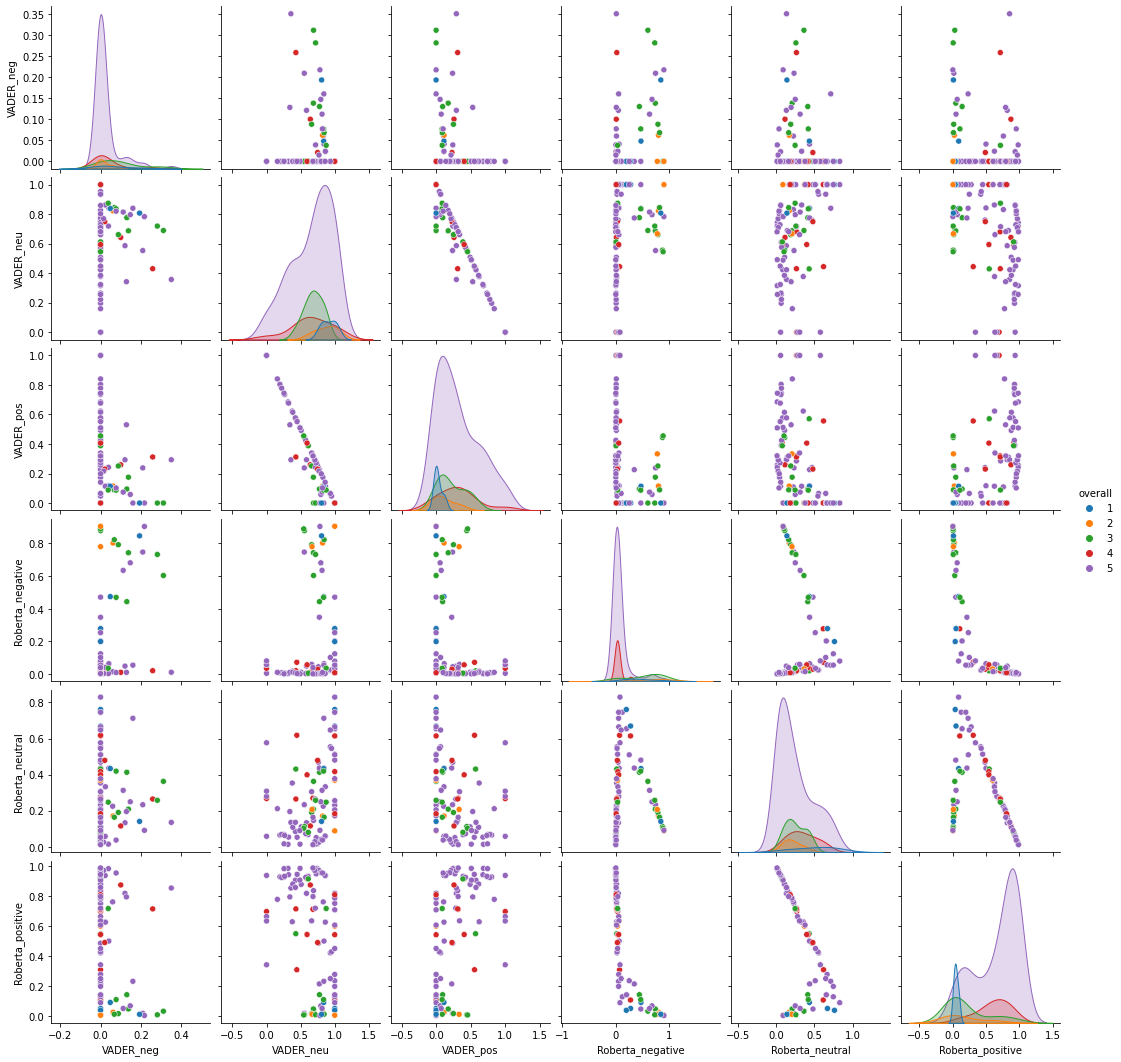

In [265]:
#drawing pairplots
sns.pairplot(data=results_df,
             vars=['VADER_neg', 'VADER_neu', 'VADER_pos',
                  'Roberta_negative', 'Roberta_neutral', 'Roberta_positive'],
            hue='overall',
            palette='tab10')
plt.show()

# **Evaluate the Model with sample input reviews**

In [269]:
#Roberta predict as positive and reviewer given the score as 1(highest positive score given by Roberta)
results_df.query('overall == 1').sort_values('Roberta_positive', ascending=False)['reviewText'].values[0]

'sloppy fit in shop vac hose as reported by others   if they were priced lower i could swallow that pill  but thumbs down on this purchase at the going amazon price of      '

In [272]:
#VADER predict as positive and reviewer given the score as 1(highest positive score given by VADER)
results_df.query('overall == 1').sort_values('VADER_pos', ascending=False)['reviewText'].values[0]

'sloppy fit in shop vac hose as reported by others   if they were priced lower i could swallow that pill  but thumbs down on this purchase at the going amazon price of      '

In [273]:
#VADER predict as positive and reviewer given the score as 1(highest negative score given by Roberta)
results_df.query('overall == 5').sort_values('Roberta_negative', ascending=False)['reviewText'].values[0]

'i disagree with some reviews saying that the cutting tool doesn t work  maybe they used the wrong end of the tube  as one end is sharp  the other is not '

In [274]:
#VADER predict as positive and reviewer given the score as 1(highest negative score given by Roberta)
results_df.query('overall == 5').sort_values('VADER_neg', ascending=False)['reviewText'].values[0]

'works great  no problems encountered wit the seller'